In [3]:
%pip install torch --upgrade
%pip install torchvision
%pip install pytorch-lightning --upgrade
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning import Trainer

In [5]:
# Synthetic Data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.3*torch.rand(x.size())
dataset = TensorDataset(x, y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [6]:
# Define the PyTorch Lightning Model
class LitNet(pl.LightningModule):
    def __init__(self):
        super(LitNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = torch.nn.functional.mse_loss(y_hat, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.01)

# Create the model
model = LitNet()

In [7]:
# Train the model
trainer = Trainer(max_epochs=1000)
trainer.fit(model, train_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 20    
1 | fc2  | Linear | 110   
2 | fc3  | Linear | 11    
--------------------------------
141       Trainable params
0         Non-trainable params
141       Total params
0.001     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.


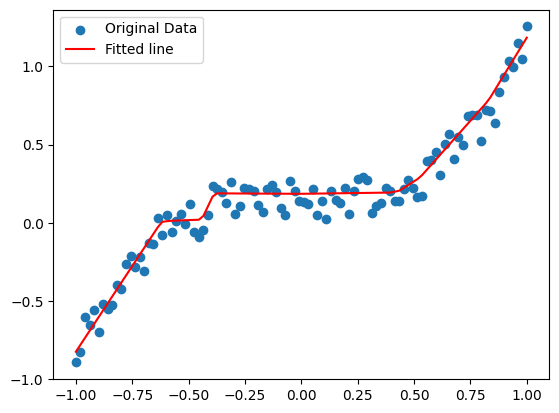

In [8]:
# Plot the results
with torch.no_grad():
    predicted = model(x).numpy()
plt.scatter(x.numpy(), y.numpy(), label='Original Data')
plt.plot(x.numpy(), predicted, label='Fitted line', color='r')
plt.legend()
plt.show()